# Name: Md Rasel
## Matriculation no: 2130710

## RiMEA Test 1 Maintaining the specified walking speed in a corridor
It is to be proven that a person in a 2 m wide and 40 m long corridor with a defined walking speed will 
cover the distance in the corresponding time period.

If 40 cm (body dimension), 1 second (premovement time) and 5% (walking speed)are set as imprecise values, then the following requirement results with a typical pedestrian speed of 1.33 m/sec: the speed should be set at a value between 4.5 and 5.1 km/h. The travel time should lie in the range of 26 to 34 
seconds when 1.33 m/sec is set as the speed.

I have used [Jupedsim](https://www.jupedsim.org/stable/notebooks/corner.html) as my starting point. 

In [1]:
import pathlib
import pedpy
import shapely
from shapely import Polygon
import jupedsim as jps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from rich.console import Console
from rich.progress import Progress

All the required libraries are called above.

## Setting up the Geometry

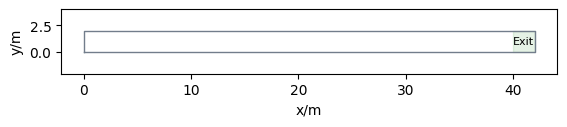

In [2]:
corridor = shapely.Polygon([(0, 0), (42, 0), (42, 2), (0, 2)])

exit_polygon = shapely.Polygon(([(40,0), (42,0), (42,2), (40,2)]))

walkable_area = pedpy.WalkableArea(corridor)

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_aspect("equal")
_, ymin, _, ymax = walkable_area.bounds
ax.set_ylim(ymin - 2, ymax + 2)
pedpy.plot_walkable_area(walkable_area=walkable_area, axes=ax)

x, y = Polygon(exit_polygon).exterior.xy
plt.fill(x, y, alpha=0.1, color="green")
centroid = Polygon(exit_polygon).centroid
plt.text(centroid.x, centroid.y, "Exit", ha="center", va="center", fontsize=8)

plt.show()

# Definition of Start Positions and Exit
2 m wide and 40 m long corridor with 1 agent.

In [3]:
spawning_area = Polygon([(0, 0), (40, 0), (40, 2), (0, 2)])
num_agents = 1


The spawning area is shown in grey and the exit area in green.

In [4]:
def plot_simulation_configuration(
    walkable_area, spawning_area, exit_polygon
):
    axes = pedpy.plot_walkable_area(walkable_area=walkable_area)
    axes.fill(*spawning_area.exterior.xy, color="lightgrey")
    axes.fill(*exit_polygon.exterior.xy, color="green")
    #axes.scatter(*zip(*starting_positions))
    axes.set_xlabel("x/m")
    axes.set_ylabel("y/m")
    axes.set_aspect("equal")

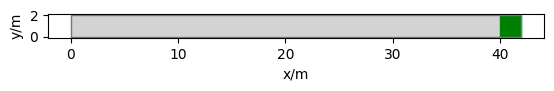

In [5]:
plot_simulation_configuration(
    walkable_area, spawning_area, exit_polygon
)

# Setting up and executing the Simulation
The operational model used for this imulation is "Collision-free speed model". Default values for the model parameters are set implicitly.

In [6]:
import sys


console = Console()
trajectory_file = "RiMEA_Test_1.sqlite"

corridor = shapely.Polygon([(0, 0), (42, 0), (42, 2), (0, 2)])
exit_polygon = shapely.Polygon([(41,0), (42,0), (42,2), (41,2)])

agent_speed = 1.33  # m/sec
body_dimension = 0.4  # m
premovement_time = 1.0  # sec


filename = f"RiMEA_Test_1.sqlite"
simulation_cfsm = jps.Simulation(
    model=jps.CollisionFreeSpeedModel(),
    geometry=corridor,
    trajectory_writer=jps.SqliteTrajectoryWriter(
        output_file=pathlib.Path(filename),
    ),
)
exit_id = simulation_cfsm.add_exit_stage(exit_polygon)
journey = jps.JourneyDescription([exit_id])
journey_id = simulation_cfsm.add_journey(journey)   


number_agents = 1

simulation_cfsm.add_agent(
    jps.CollisionFreeSpeedModelAgentParameters(
        v0 = 1.33,
        journey_id=journey_id,
        stage_id=exit_id,
        position = (0.2, 1.0), 
        radius = body_dimension / 2,

    )
)


with Progress() as progress:
    task = progress.add_task(
        "[cyan]Running simulation..."
    )
while simulation_cfsm.agent_count() > 0:
    try:
        simulation_cfsm.iterate()
        time = simulation_cfsm.elapsed_time()
        
    except KeyboardInterrupt:
            print("CTRL-C Recieved! Shuting down")
            sys.exit(1)
print(f"Elapsed time is {time} seconds.")
console.print(
    f"Simulation completed after {simulation_cfsm.iteration_count()} iterations.\n"
    f"[bold red]File: {filename}")

#if __name__ == "__main__":
 #   main()
  #  trajectory_data, walkable_area = read_sqlite_file(trajectory_file)
   # animate(trajectory_data, walkable_area)


Output()

Elapsed time is 30.7 seconds.


Simulation completed after 3070 iterations.
File: RiMEA_Test_1.sqlite

# Visualizing the Trajectory

In [7]:
from jupedsim.internal.notebook_utils import animate, read_sqlite_file

trajectory_data, walkable_area = read_sqlite_file(trajectory_file)
animate(trajectory_data, walkable_area).show()

As expected, the agent chooses the shortest path and takes 30.7 seconds which is in the proper range (26-34 seconds) for the speed 1.33 m/sec.